In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("data/kaggle_titanic_train.csv")

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
len(df)

891

### # 데이터 분석1
- 남자/여자별 승객수 분석 결과
- 객실 등급별 승객수 분석 결과

In [5]:
type(df['Sex'])

pandas.core.series.Series

In [6]:
len(df['Sex'])

891

In [7]:
df['Sex'][0]

'male'

In [8]:
df['Sex'][0:5]

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [12]:
df['Sex']

0        male
1      female
2      female
3      female
4        male
5        male
6        male
7        male
8      female
9      female
10     female
11     female
12       male
13       male
14     female
15     female
16       male
17       male
18     female
19     female
20       male
21       male
22     female
23       male
24     female
25     female
26       male
27       male
28     female
29       male
        ...  
861      male
862    female
863    female
864      male
865    female
866    female
867      male
868      male
869      male
870      male
871    female
872      male
873      male
874    female
875    female
876      male
877      male
878      male
879    female
880    female
881      male
882    female
883      male
884      male
885    female
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [9]:
from functools import * 

In [10]:
def count_columns(result_dic, element) : 
    if result_dic.get(element):
        result_dic[element] += 1
    else:
        result_dic[element] = 1
        
    return result_dic

def get_group_count(df_column) :
    return reduce(count_columns, df_column, dict())

In [11]:
result = get_group_count(df['Sex'])
result

{'male': 577, 'female': 314}

In [14]:
result = get_group_count(df['Pclass'])
result

{3: 491, 1: 216, 2: 184}

In [15]:
len(df['Sex'][df.Sex=='female'])

314

In [16]:
len(df['Pclass'][df.Pclass==1])

216

### # 데이터 분석2
- 남자/여자 & 객실 등급별 승객수 분석 결과

In [17]:
len(df)

891

In [19]:
idx = 0
df_columns = []

element = df['Sex'][idx], df['Pclass'][idx]

df_columns.append(element)
df_columns

[('male', 3)]

In [20]:
df_columns = []

for idx in range(len(df)):
    element = df['Sex'][idx], df['Pclass'][idx]
    df_columns.append(element)
    
len(df_columns)

891

In [21]:
df_columns[:10]

[('male', 3),
 ('female', 1),
 ('female', 3),
 ('female', 1),
 ('male', 3),
 ('male', 3),
 ('male', 1),
 ('male', 3),
 ('female', 3),
 ('female', 2)]

# !!

In [22]:
def get_group_count(df_columns) :
    
    print('len(df_columns) :', len(df_columns))
    
    def count_columns(result_dic, element_tuple) :
        element1, element2 = element_tuple
        # print(element1, ':', element2)

        if not (result_dic.get(element1)) :
            result_dic[element1] = {}
              
        if result_dic[element1].get(element2) :
            result_dic[element1][element2] += 1
        else :
            result_dic[element1][element2] = 1

        return result_dic
    
    result = reduce(count_columns, df_columns, dict())
    return result

In [23]:
result = get_group_count(df_columns) 
result

len(df_columns) : 891


{'male': {3: 347, 1: 122, 2: 108}, 'female': {1: 94, 3: 144, 2: 76}}

In [24]:
dict_element = result['female']
dict_element

{1: 94, 3: 144, 2: 76}

In [25]:
dict_values = [dict_element[key] for key in dict_element.keys()] 
dict_values

[94, 144, 76]

In [26]:
sum(dict_values)

314

In [27]:
count_f = []
count_m = []

for i in range(3):
    idx = i+1
    count_f.append(result['female'][idx])
    count_m.append(result['male'][idx])

In [28]:
count_f, count_m


([94, 76, 144], [122, 108, 347])

### # 데이터 분석결과 시각화

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/MALGUN.TTF").get_name()
rc('font', family=font_name)

plt.rcParams['figure.figsize'] = (10,6)

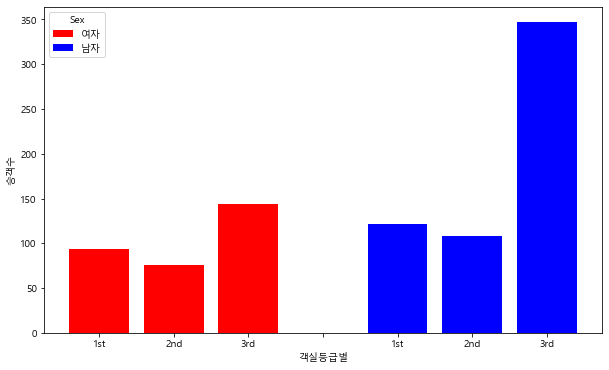

In [32]:
t1 = [1,2,3]
t2 = [5,6,7]

plt.bar(t1, count_f, color='r', label='여자')
plt.bar(t2, count_m, color='b', label='남자')

plt.xlabel('객실등급별')
plt.ylabel('승객수')
plt.legend(title='Sex')

t = list(range(1,8))
plt.xticks(t, ('1st','2nd','3rd','','1st','2nd','3rd'))

plt.show()

In [33]:
count_p1 = count_f[0], count_m[0]
count_p2 = count_f[1], count_m[1]
count_p3 = count_f[2], count_m[2]

count_p1, count_p2, count_p3

((94, 122), (76, 108), (144, 347))

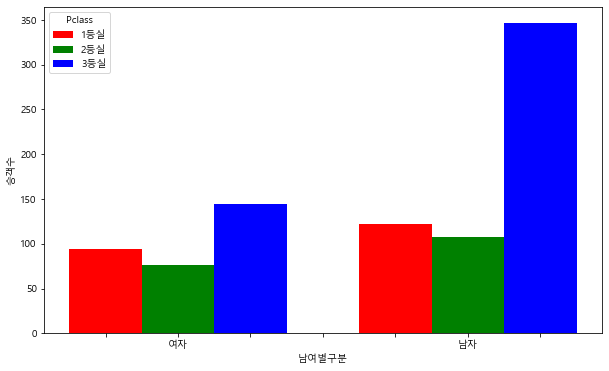

In [34]:
t1 = [ 1, 5 ]
t2 = [ 2, 6 ]
t3 = [ 3, 7 ]

plt.figure(figsize=(10,6))
plt.bar(t1, count_p1, color='r', width=1, label='1등실')
plt.bar(t2, count_p2, color='g', width=1, label='2등실')
plt.bar(t3, count_p3, color='b', width=1, label='3등실')

plt.xlabel('남여별구분')
plt.ylabel('승객수')

plt.legend(title='Pclass')

t = list(range(1,8))
plt.xticks(t , ('','여자','','','','남자',''))

plt.show()

In [35]:
from pandas import Series, DataFrame

In [36]:
df_tmp = DataFrame({
    'Sex' : df.Sex,
    'Pclass' : df.Pclass
})

df_tmp

,Sex,Pclass
0,male,3
1,female,1
2,female,3
3,female,1
4,male,3
5,male,3
6,male,1
7,male,3
8,female,3
9,female,2


In [37]:
len(df[df.Sex=='female'][df.Pclass==1])

C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


94

In [39]:
df_tmp_f = df_tmp[df_tmp.Sex=='female']
df_tmp_f.head()

,Sex,Pclass
1,female,1
2,female,3
3,female,1
8,female,3
9,female,2


In [41]:
df_tmp_f1 = df_tmp_f[df_tmp_f.Pclass==1]
df_tmp_f1.head()

,Sex,Pclass
1,female,1
3,female,1
11,female,1
31,female,1
52,female,1


In [42]:
len(df_tmp_f1)

94

In [45]:
df_tmp_f1[::10]

,Sex,Pclass
1,female,1
177,female,1
269,female,1
311,female,1
369,female,1
498,female,1
571,female,1
700,female,1
781,female,1
862,female,1


In [46]:
len(df_tmp)

891

In [47]:
df_tmp['Category']=''
df_tmp.head()

,Sex,Pclass,Category
0,male,3,
1,female,1,
2,female,3,
3,female,1,
4,male,3,


In [48]:
df_tmp.index

RangeIndex(start=0, stop=891, step=1)

In [ ]:
for idx in df_tmp.index:
    Pclass = df_tmp['Pclass'][idx]
    sex = df_tmp['Sex'][idx]
    category = '{}:{}'.format(pclass,sex)
    
    if (idx%100==0) or (idx==len(df_tmp)-1): print(idx, '\t=>', category)